In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
boston = load_boston()

In [7]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([X, y], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
print(X.shape, y.shape)

(506, 13) (506, 1)


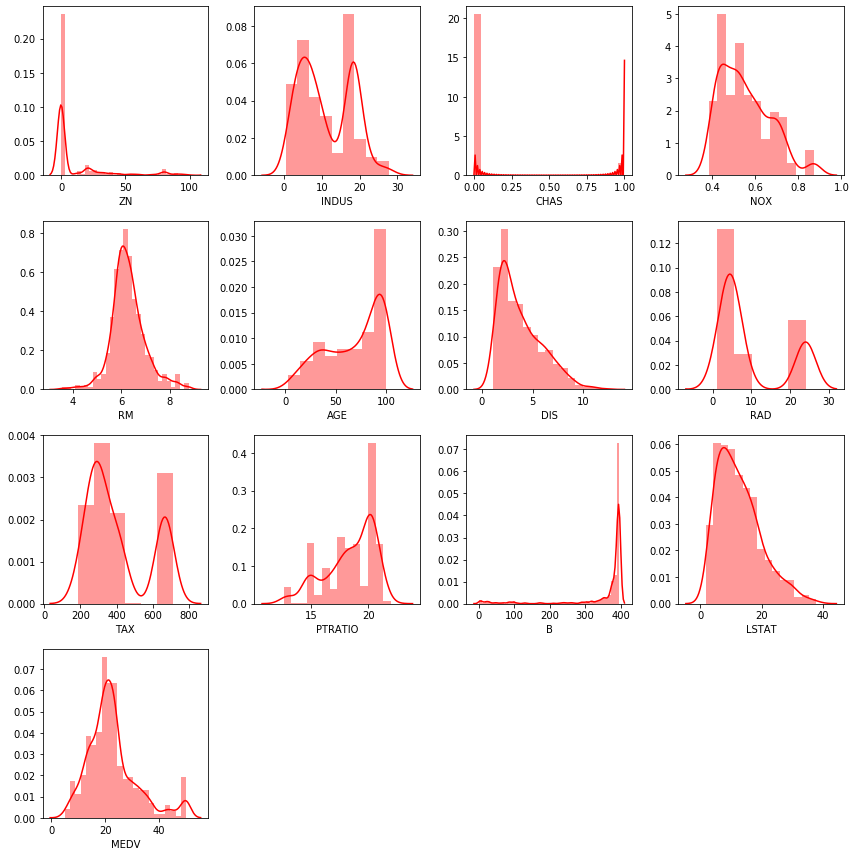

In [22]:
plt.figure(figsize=(12, 12))
for i in range(1,14):    
    plt.subplot(4,4,i)
    sns.distplot(df.iloc[:,i], color='red')
plt.tight_layout()
plt.show()

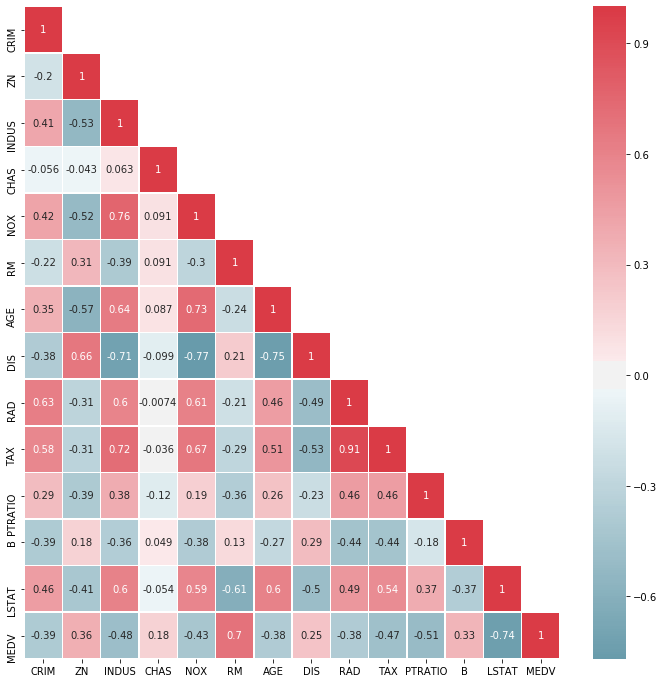

In [44]:
df_corr = df.corr()
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(df_corr, mask=mask, cmap=cmap, linewidths=.5, center=0, annot=True)

In [146]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 13) (51, 13) (455, 1) (51, 1)


In [147]:
def fitting_model(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('r2_sqaure : {:.3f}, rmse: {:.3f}'.format(r2, mse))

In [148]:
model = LinearRegression(fit_intercept=True)
fitting_model(model)

r2_sqaure : 0.779, rmse: 4.533


In [149]:
model = Ridge(alpha = 0.05)
fitting_model(model)

r2_sqaure : 0.779, rmse: 4.527


In [150]:
model = Lasso(alpha = 0.05)
fitting_model(model)

r2_sqaure : 0.780, rmse: 4.520


---

#### Ensemble Regressor

In [151]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
fitting_model(model)

r2_sqaure : 0.858, rmse: 3.636


In [152]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
fitting_model(model)

Learning rate set to 0.033926
0:	learn: 8.9448255	total: 3.52ms	remaining: 3.52s
1:	learn: 8.7547057	total: 4.8ms	remaining: 2.4s
2:	learn: 8.5700872	total: 6.08ms	remaining: 2.02s
3:	learn: 8.4346621	total: 7.65ms	remaining: 1.9s
4:	learn: 8.2730342	total: 8.96ms	remaining: 1.78s
5:	learn: 8.1151678	total: 10.2ms	remaining: 1.7s
6:	learn: 7.9635454	total: 11.8ms	remaining: 1.68s
7:	learn: 7.8187406	total: 13.5ms	remaining: 1.68s
8:	learn: 7.6823806	total: 15.3ms	remaining: 1.69s
9:	learn: 7.5430624	total: 17.3ms	remaining: 1.72s
10:	learn: 7.3885373	total: 18.8ms	remaining: 1.69s
11:	learn: 7.2501465	total: 20.6ms	remaining: 1.7s
12:	learn: 7.1140513	total: 21.9ms	remaining: 1.66s
13:	learn: 6.9812848	total: 23.4ms	remaining: 1.65s
14:	learn: 6.8736229	total: 24.9ms	remaining: 1.63s
15:	learn: 6.7398667	total: 26.3ms	remaining: 1.62s
16:	learn: 6.6341394	total: 27.8ms	remaining: 1.6s
17:	learn: 6.5346500	total: 29.5ms	remaining: 1.61s
18:	learn: 6.4201789	total: 31.1ms	remaining: 1.6s

In [153]:
from lightgbm import LGBMRegressor
model = LGBMRegressor()
fitting_model(model)

r2_sqaure : 0.912, rmse: 2.858


In [154]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
fitting_model(model)

r2_sqaure : 0.933, rmse: 2.501


In [155]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor()
fitting_model(model)

r2_sqaure : 0.926, rmse: 2.621


In [156]:
from xgboost import XGBRegressor
model = XGBRegressor()
fitting_model(model)

r2_sqaure : 0.935, rmse: 2.452


In [157]:
from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor()
fitting_model(model)

r2_sqaure : 0.939, rmse: 2.375
